In [4]:
import numpy as np
import pandas as pd

%precision 3
pd.options.display.precision = 3

In [5]:
df = pd.read_csv('../data/ch2_scores_em.csv', index_col= 'student number')
df.head()

,english,mathematics
student number,,
1,42,65
2,69,80
3,56,63
4,41,63
5,57,76


In [6]:
scores = np.array(df['english'])[:10]
scores

array([42, 69, 56, 41, 57, 48, 65, 49, 65, 58], dtype=int64)

In [7]:
scores_df = pd.DataFrame({'scores' : scores},
                         index = pd.Index(['A', 'B', 'C', 'D', 'E',
                                           'F', 'G', 'H', 'I', 'J'],
                                          name='student'))
scores_df 

,scores
student,
A,42
B,69
C,56
D,41
E,57
F,48
G,65
H,49
I,65


1. 데이터 중심의 지표

- 1-1 평균값

In [8]:
sum(scores)/ len(scores)

55.000

In [9]:
np.mean(scores)

55.000

In [10]:
scores_df.mean()

scores    55.0
dtype: float64

- 1-2. 중앙값

In [11]:
sorted_scores = np.sort(scores)
sorted_scores

array([41, 42, 48, 49, 56, 57, 58, 65, 65, 69], dtype=int64)

In [12]:
n = len(sorted_scores)
if n%2 == 0:
    m0 = sorted_scores[n//2 -1]
    m1 = sorted_scores[n//2]
    median = (m0+m1) / 2
    
else:
    median = sorted_scores[(n+1) // 2 -1]
median

56.500

In [13]:
np.median(scores)

56.500

In [14]:
scores_df.median()

scores    56.5
dtype: float64

- 1-3. 최빈값

In [15]:
pd.Series([1,1,1,2,2,3]).mode()

0    1
dtype: int64

In [16]:
pd.Series([1,2,3,4,5]).mode()

0    1
1    2
2    3
3    4
4    5
dtype: int64

2. 데이터의 산포도 지표
- 2-1. 분산과 표준편차

In [17]:
mean = np.mean(scores)
deviation = scores - mean
deviation 

array([-13.,  14.,   1., -14.,   2.,  -7.,  10.,  -6.,  10.,   3.])

In [18]:
another_scores = [50,60,58,54,51,56,57,53,52,59]
another_mean = np.mean(another_scores)
another_deviaition = another_scores - another_mean
another_deviaition

array([-5.,  5.,  3., -1., -4.,  1.,  2., -2., -3.,  4.])

In [20]:
np.mean(deviation)

0.000

In [21]:
np.mean(another_deviaition)

0.000

In [22]:
summary_df = scores_df.copy()
summary_df['deviation'] = deviation
summary_df

,scores,deviation
student,,
A,42,-13.0
B,69,14.0
C,56,1.0
D,41,-14.0
E,57,2.0
F,48,-7.0
G,65,10.0
H,49,-6.0
I,65,10.0


In [23]:
summary_df.mean()

scores       55.0
deviation     0.0
dtype: float64

In [24]:
np.mean(deviation**2)

86.000

In [25]:
np.var(scores)

86.000

In [26]:
scores_df.var()

scores    95.556
dtype: float64

In [27]:
summary_df['square_of_deviation'] = np.square(deviation)
summary_df

,scores,deviation,square_of_deviation
student,,,
A,42,-13.0,169.0
B,69,14.0,196.0
C,56,1.0,1.0
D,41,-14.0,196.0
E,57,2.0,4.0
F,48,-7.0,49.0
G,65,10.0,100.0
H,49,-6.0,36.0
I,65,10.0,100.0


In [28]:
summary_df.mean()

scores                 55.0
deviation               0.0
square_of_deviation    86.0
dtype: float64

In [29]:
np.sqrt(np.var(scores, ddof=0))

9.274

In [30]:
np.std(scores, ddof=0)

9.274

- 2-2. 범위와 사분위 범위

In [31]:
np.max(scores) - np.min(scores)

28

In [32]:
scores_Q1 = np.percentile(scores, 25)
scores_Q3 = np.percentile(scores, 75)
scores_IQR = scores_Q3 - scores_Q1
scores_IQR

15.000

- 2-3. 데이터의 지표 정리

In [33]:
pd.Series(scores).describe()

count    10.000
mean     55.000
std       9.775
min      41.000
25%      48.250
50%      56.500
75%      63.250
max      69.000
dtype: float64

3. 데이터의 정규화
- 3-1. 표준화

In [34]:
z = (scores - np.mean(scores)) / np.std(scores)
z

array([-1.402,  1.51 ,  0.108, -1.51 ,  0.216, -0.755,  1.078, -0.647,
        1.078,  0.323])

표준화된 데이터는 평균이 0, 표준편차가 1

In [35]:
np.mean(z)

-0.000

In [36]:
np.std(z, ddof = 0)

1.000

- 3-2. 편찻값

In [37]:
z = 50 + 10 * (scores - np.mean(scores)) / np.std(scores)
z

array([35.982, 65.097, 51.078, 34.903, 52.157, 42.452, 60.783, 43.53 ,
       60.783, 53.235])

In [38]:
scores_df['deviation_value'] = z
scores_df

,scores,deviation_value
student,,
A,42,35.982
B,69,65.097
C,56,51.078
D,41,34.903
E,57,52.157
F,48,42.452
G,65,60.783
H,49,43.530
I,65,60.783


4. 1차원 데이터의 시각화

In [39]:
# 50명의 영어 점수 array
english_scores = np.array(df['english'])

#Series로 변환하여 describe를 표시
pd.Series(english_scores).describe()

count    50.00
mean     58.38
std       9.80
min      37.00
25%      54.00
50%      57.50
75%      65.00
max      79.00
dtype: float64

- 4-1. 도수분포표

In [40]:
freq, _ = np.histogram(english_scores, bins=10, range=(0,100))
freq

array([ 0,  0,  0,  2,  8, 16, 18,  6,  0,  0], dtype=int64)

In [41]:
# 0~10, 10~20,...이라는 문자열 리스트를 작성
freq_class = [f'{i} ~ {i+1}' for i in range(0,100,10)]

#freq_class를 인덱스로 DataFrame 작성
freq_dist_df = pd.DataFrame({'frequency' : freq},
                            index = pd.Index(freq_class, name = 'class'))
freq_dist_df

,frequency
class,
0 ~ 1,0
10 ~ 11,0
20 ~ 21,0
30 ~ 31,2
40 ~ 41,8
50 ~ 51,16
60 ~ 61,18
70 ~ 71,6
80 ~ 81,0


In [42]:
#  계급값 : 계급의 중앙값
class_value = [(i+(i+10))//2 for i in range(0,100,10)]
class_value

[5, 15, 25, 35, 45, 55, 65, 75, 85, 95]

In [43]:
# 상대도수
rel_freq = freq/freq.sum()
rel_freq

array([0.  , 0.  , 0.  , 0.04, 0.16, 0.32, 0.36, 0.12, 0.  , 0.  ])

In [44]:
cum_rel_freq = np.cumsum(rel_freq)
cum_rel_freq

array([0.  , 0.  , 0.  , 0.04, 0.2 , 0.52, 0.88, 1.  , 1.  , 1.  ])

In [47]:
freq_dist_df['class value'] = class_value
freq_dist_df['relative frequency'] = rel_freq
freq_dist_df['cumulative relative frequency'] = cum_rel_freq
freq_dist_df[['class value', 'frequency', 'relative frequency', 'cumulative relative frequency']]

freq_dist_df

,frequency,class value,relative frequency,cumulative relative frequency
class,,,,
0 ~ 1,0,5,0.00,0.00
10 ~ 11,0,15,0.00,0.00
20 ~ 21,0,25,0.00,0.00
30 ~ 31,2,35,0.04,0.04
40 ~ 41,8,45,0.16,0.20
50 ~ 51,16,55,0.32,0.52
60 ~ 61,18,65,0.36,0.88
70 ~ 71,6,75,0.12,1.00
80 ~ 81,0,85,0.00,1.00


In [48]:
freq_dist_df.loc[freq_dist_df['frequency'].idxmax(), 'class value']

65

- 4-2. 히스토그램

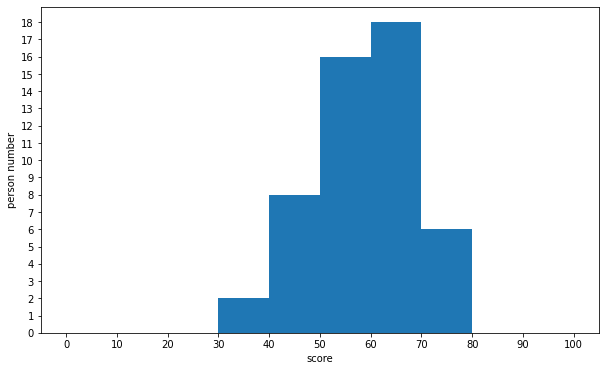

In [51]:
import matplotlib.pyplot as plt
%matplotlib inline

fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111)

freq, _, _ = ax.hist(english_scores, bins=10, range=(0,100))
ax.set_xlabel('score')
ax.set_ylabel('person number')

ax.set_xticks(np.linspace(0,100,10+1))
ax.set_yticks(np.arange(0, freq.max()+1 ))
plt.show()

c:\Users\wagar\AppData\Local\Programs\Python\Python310\lib\site-packages\matplotlib\text.py:1223: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


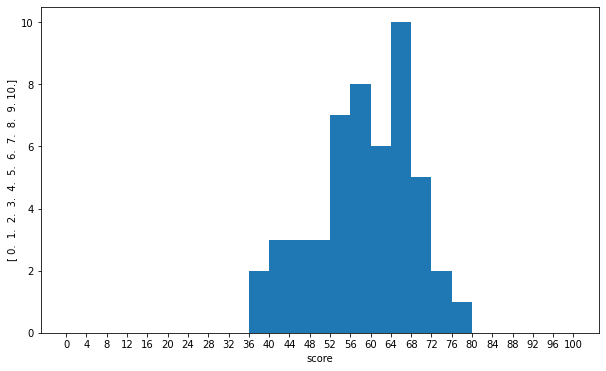

In [53]:
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111)

freq, _, _ = ax.hist(english_scores, bins=25, range=(0,100))
ax.set_xlabel('score')
ax.set_ylabel('person number')

ax.set_xticks(np.linspace(0,100,25+1))
ax.set_ylabel(np.arange(0, freq.max()+1))

plt.show()

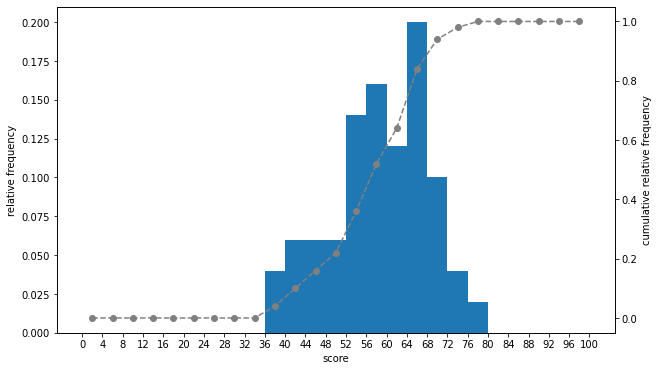

In [55]:
fig = plt.figure(figsize=(10,6))
ax1 = fig.add_subplot(111)
#y축의 스케일이 다른 그래프를 ax1과 동일한 영역에 생성
ax2 = ax1.twinx()

weights = np.ones_like(english_scores) / len(english_scores)
rel_freq, _, _ = ax1.hist(english_scores, bins=25, 
                         range=(0,100), weights=weights)

cum_rel_freq = np.cumsum(rel_freq)
class_value = [(i+(i+4))//2 for i in range(0,100,4)]

ax2.plot(class_value, cum_rel_freq, 
         ls = '--', marker='o', color='gray')
ax2.grid(visible=False)

ax1.set_xlabel('score')
ax1.set_ylabel('relative frequency')
ax2.set_ylabel('cumulative relative frequency')
ax1.set_xticks(np.linspace(0,100,25+1))

plt.show()

- 4-3. 상자그림

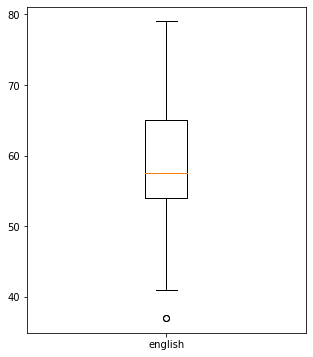

In [57]:
fig = plt.figure(figsize=(5,6))
ax = fig.add_subplot(111)
ax.boxplot(english_scores, labels=['english'])

plt.show()